### Project Title:

##### Compare the effectiveness of using embedding vectors versus sequence similarity for distinguishing kinase and phosphatase proteins family.

In [1]:
from Bio import AlignIO
import itertools
import pandas as pd

#### Pairwise similarity using only the primary structure of the protein.

kinase and phosphatase aligned files 

Pairwise similarity score provides a relevant measure of similarity between protein sequences

Pairwise Similarity are use for various purposes:
- Proteins within same family are assumed to have common ancesters, by examining protein sequence similarities between different members, we can infer their evolutionary relationships

 - Protein which have high degree of sequence similarity, it is likely that they also share similar three-dimensional structures and biological functions.

 - By calculating pairwise sequence similarities among members of a protein family, researchers can gain valuable insights into the family's evolution, structure-function relationships and frequently use in research. 

Stockholm format is a multiple sequence alignment format used by Pfam, 

Calculate percent identity two sequences without gap consideration.
The gap character ('-') it will count it towards high similarity even though 
there is not a single sequence character involved therefore, I consider without gap_chars=['-', '.']). 


#####


In [2]:
# Define the file paths for kinase and phosphatase alignment files
kinase_alignment = "PF00069.alignment.seed.txt"
phosphatase_alignment = "PF00102.alignment.seed.txt"


In [3]:
# Read the kinase alignment from file
with open(kinase_alignment, "r") as kinase_handle:
    kinase_alignment = AlignIO.read(kinase_handle, "stockholm")


print("Kinase Alignment:")
for i, record in enumerate(kinase_alignment[:3]): 
    print(f">{record.id}")
    print(record.seq)
    print()

Kinase Alignment:
>TTK_HUMAN/525-791
YSILKQIGSGGSSKV--FQVLN-EKKQIYAIKYVNLEEADNQTL------DSYRNEIAYLNKLQQ-HSDKIIRLYDYEIT-------------DQYIY--MVMECGNID-----LNSWLK-------KKKS-IDPW-------ERK-SYWKNMLEAVHTIH-QHG---IVHSDLKPANFLIV------------DGM--------LKLIDFGIANQMQPDTTS----------------VVKDSQVGTVNYMPPEAIKDMSSSRENGKS---KSKISPKSDVWSLGCILYYMTYGKTPFQQIINQISKLHAIID---------------------------------PNHEI-------------------------EFPDIPEKDLQDVLKCCLKRDPKQRIS-----IPELLAHPYV

>MKK1_YEAST/221-488
IETLGILGEGAGGSV--SKCKLKNGSKIFALKVINTLNTDPEYQ------KQIFRELQFNRSFQ---SEYIVRYYGMFTDD-----------ENSSIY--IAMEYMGGRSLDAIYKNLLE-------RGGR-ISEK-------VLG-KIAEAVLRGLSYLH-EKK---VIHRDIKPQNILLN-E----------NGQ--------VKLCDFGVSGEAVNSL--------------------ATTFTGTSFYMAPERI----------QG---QPY-SVTSDVWSLGLTILEVANGKFPCS----SEKMAANIAP--FELLMWILT---------FTPELKDEPESNII----------------------------------WSPSFKSFIDYCLKKDSRERPS-----PRQMINHPWI

>STE7_YEAST/191-466
LVQLGKIGAGNSGTV--VKALHVPDSKIVAKKTIPVEQNNSTII------NQLVRELSIVKNVK--PHENIITFYGAYYNQ

In [4]:
# Read the phosphatase alignment from file
with open(phosphatase_alignment, "r") as phosphatase_handle:
    phosphatase_alignment = AlignIO.read(phosphatase_handle, "stockholm")

print("Phosphatase Alignment:")
for i, record in enumerate(phosphatase_alignment[:3]): 
    print(f">{record.id}")
    print(record.seq)
    print()

Phosphatase Alignment:
>PTN3_HUMAN/670-900
NLDKNRYKDVLPYDTTRVLL--------------------------------QGNE---D--YINASYVNM---------------EIPAAN-L---VNKYIATQGP-------L----------------P-HTC---AQFWQVVWDQ--K-LSLIVMLTTLTER---------GR---TKCHQYWP------DP-PD--VMNHGG----FHIQCQ-------SED-CTIAYVSREMLVT-----N----TQTG------------------------EEHTV-THLQYV----AWP--DHG-------VP--DD-----SSDFL----EFVNYVRSLR--------V-------D--SEPVLVHCSAGIGRTGVLVTMETAMCLTER-------NLP---IYPLD--------IVRKMR-DQRAMMVQTSSQYKFVCEAILR

>PTP1_CAEEL/777-1010
NLAKNRYRDVCPYDDTRVTL--------------------------------QASPS-GD--YINANYVNM---------------EIPSSG-I---VNRYIACQGP-------L----------------A-HTS---SDFWVMVWEQ--H-CTTIVMLTTITER---------GR---VKCHQYWP------RV-FE--TQEYGR----LMIKCI-------KDK-QTTNCCYREFSIR-----D----RNSS------------------------EERRV-TQMQYI----AWP--DHG-------VP--DD-----PKHFI----QFVDEVRKAR------Q-G-------S--VDPIVVHCSAGIGRTGVLILMETAACLVES-------NEP---VYPLD--------IVRTMR-DQRAMLIQTPGQYTFVCESILR

>PTN4_MOUSE/679-909
NISKNRYRDISPYDATRVLL----

In [5]:
#Function to calculate percent identity between two sequences with gap consideration
#def calculate_percent_identity(seq1, seq2):
#num_identical = sum(a == b for a, b in zip(seq1, seq2))
#identity = num_identical / len(seq1) * 100
 #return identity


In [6]:
## Function to calculate percent identity between two sequences without  gap consideration

def calculate_percent_identity(seq1, seq2, gap_chars=['-', '.']):
    num_identical = sum(a == b for a, b in zip(seq1, seq2))
    num_both_gaps = sum(((a in gap_chars) and (b in gap_chars)) for a, b in zip(seq1, seq2))
    identity = 100 * (num_identical - num_both_gaps) / (len(seq1) - num_both_gaps)
    return identity

### Kinase  percentage similarity calculation¶

In [7]:
# Generate pairwise combinations of indices
pairwise_combos = list(itertools.combinations(range(len(kinase_alignment)), 2))

# Calculate sequence similarity for pairwise combinations
pairwise_similarity = []
for i, j in pairwise_combos:
    seq1 = kinase_alignment[i].seq
    seq2 = kinase_alignment[j].seq
    similarity = calculate_percent_identity(seq1, seq2)
    pairwise_similarity.append((kinase_alignment[i].id, kinase_alignment[j].id, similarity))

# Create a DataFrame to store pairwise sequence similarity
df_kin_similarity = pd.DataFrame(pairwise_similarity, columns=['Sequence A', 'Sequence B', 'Similarity'])

# Display the pairwise sequence similarity
print(df_kin_similarity.head())


          Sequence A            Sequence B  Similarity
0  TTK_HUMAN/525-791    MKK1_YEAST/221-488   20.805369
1  TTK_HUMAN/525-791    STE7_YEAST/191-466   22.000000
2  TTK_HUMAN/525-791     BYR1_SCHPO/66-320   21.232877
3  TTK_HUMAN/525-791    M3K9_HUMAN/144-403   21.694915
4  TTK_HUMAN/525-791  F7CJC0_CALJA/349-568   14.840989


### Phosphatase percentage similarity calculation

In [8]:
# Generate pairwise combinations of sequence IDs
pairwise_combos = list(itertools.combinations(range(len(phosphatase_alignment)), 2))

# Calculate sequence similarity for pairwise combinations
pairwise_similarity = []
for i, j in pairwise_combos:
    seq1 = phosphatase_alignment[i].seq
    seq2 = phosphatase_alignment[j].seq
    similarity = calculate_percent_identity(seq1, seq2)
    pairwise_similarity.append((phosphatase_alignment[i].id, phosphatase_alignment[j].id, similarity))

# Create a DataFrame to store pairwise sequence similarity
df_phos_similarity = pd.DataFrame(pairwise_similarity, columns=['Sequence A', 'Sequence B', 'Similarity'])

# Display the pairwise sequence similarity
print(df_phos_similarity.head())


           Sequence A              Sequence B  Similarity
0  PTN3_HUMAN/670-900     PTP1_CAEEL/777-1010   58.974359
1  PTN3_HUMAN/670-900      PTN4_MOUSE/679-909   58.750000
2  PTN3_HUMAN/670-900  B4JBQ7_DROGR/1040-1276   26.984127
3  PTN3_HUMAN/670-900    PTN14_MOUSE/935-1181   36.758893
4  PTN3_HUMAN/670-900      PTN21_RAT/922-1167   37.903226


### Get uniprot ID phosphatase

In [9]:
import re
import pandas as pd

# Open the text file
with open('PF00102.alignment.seed.txt', 'r') as file:
    # Regular expression pattern to match sequence IDs and UniProt IDs
    pattern = r"#=GS\s+(\S+)\s+AC\s+(\w+\.\d+)"
    
    # Lists to store sequence IDs and UniProt IDs
    sequence_ids = []
    uniprot_ids = []
    
    # Read each line in the file
    for line in file:
        # Search for the pattern in the line
        match = re.search(pattern, line)
        
        # If a match is found, append sequence ID and UniProt ID to the respective lists
        if match:
            sequence_id = match.group(1)
            uniprot_id = match.group(2)
            sequence_ids.append(sequence_id)
            uniprot_ids.append(uniprot_id)

# Create DataFrame
Phosphatase_seq_ids = pd.DataFrame({'Sequence ID': sequence_ids, 'UniProt ID': uniprot_ids})

# Display DataFrame
print(Phosphatase_seq_ids.head())


              Sequence ID UniProt ID
0      PTN3_HUMAN/670-900   P26045.2
1     PTP1_CAEEL/777-1010   P28191.3
2      PTN4_MOUSE/679-909   Q9WU22.2
3  B4JBQ7_DROGR/1040-1276   B4JBQ7.1
4    PTN14_MOUSE/935-1181   Q62130.2


### Get uniprot ID Kinase 

In [10]:
# Open the text file for Kinase 
with open('PF00069.alignment.seed.txt', 'r') as file:
    # Regular expression pattern to match sequence IDs and UniProt IDs
    pattern = r"#=GS\s+(\S+)\s+AC\s+(\w+\.\d+)"
    
    # Lists to store sequence IDs and UniProt IDs
    sequence_ids = []
    uniprot_ids = []
    
    # Read each line in the file
    for line in file:
        # Search for the pattern in the line
        match = re.search(pattern, line)
        
        # If a match is found, append sequence ID and UniProt ID to the respective lists
        if match:
            sequence_id = match.group(1)
            uniprot_id = match.group(2)
            sequence_ids.append(sequence_id)
            uniprot_ids.append(uniprot_id)

# Create DataFrame
Kinase_seq_ids = pd.DataFrame({'Sequence ID': sequence_ids, 'UniProt ID': uniprot_ids})

# Display DataFrame
print(Kinase_seq_ids.head())

          Sequence ID UniProt ID
0   TTK_HUMAN/525-791   P33981.2
1  MKK1_YEAST/221-488   P32490.1
2  STE7_YEAST/191-466   P06784.1
3   BYR1_SCHPO/66-320   P10506.1
4  M3K9_HUMAN/144-403   P80192.3


### Match with uniprot Id with sequence ID 

#### Phosphatase 

In [11]:
# Create a dictionary to map Sequence IDs to UniProt IDs for Phosphatase 
sequence_to_uniprot_map = dict(zip(Phosphatase_seq_ids['Sequence ID'], Phosphatase_seq_ids['UniProt ID']))

# Replace Sequence A values with corresponding UniProt IDs
df_phos_similarity['Sequence A'] = df_phos_similarity['Sequence A'].map(sequence_to_uniprot_map)

# Replace Sequence B values with corresponding UniProt IDs
df_phos_similarity['Sequence B'] = df_phos_similarity['Sequence B'].map(sequence_to_uniprot_map)

#print(df_phos_similarity)


In [12]:
#Phosphatase with % similarity
print(df_phos_similarity.head())

  Sequence A Sequence B  Similarity
0   P26045.2   P28191.3   58.974359
1   P26045.2   Q9WU22.2   58.750000
2   P26045.2   B4JBQ7.1   26.984127
3   P26045.2   Q62130.2   36.758893
4   P26045.2   Q62728.1   37.903226


#### Kinase

In [13]:
# Create a dictionary to map Sequence IDs to UniProt IDs for Kinase
sequence_to_uniprot_map = dict(zip(Kinase_seq_ids['Sequence ID'], Kinase_seq_ids['UniProt ID']))

# Replace Sequence A values with corresponding UniProt IDs
df_kin_similarity['Sequence A'] = df_kin_similarity['Sequence A'].map(sequence_to_uniprot_map)

# Replace Sequence B values with corresponding UniProt IDs
df_kin_similarity['Sequence B'] = df_kin_similarity['Sequence B'].map(sequence_to_uniprot_map)

#print(df_kin_similarity)

In [14]:
# Kinsase % similarity with uniprot ID 
print(df_kin_similarity.head())

  Sequence A Sequence B  Similarity
0   P33981.2   P32490.1   20.805369
1   P33981.2   P06784.1   22.000000
2   P33981.2   P10506.1   21.232877
3   P33981.2   P80192.3   21.694915
4   P33981.2   F7CJC0.2   14.840989


#### We have two data frame ``df_kin_similarity`` and ``df_phos_similarity``.

## Visualization 

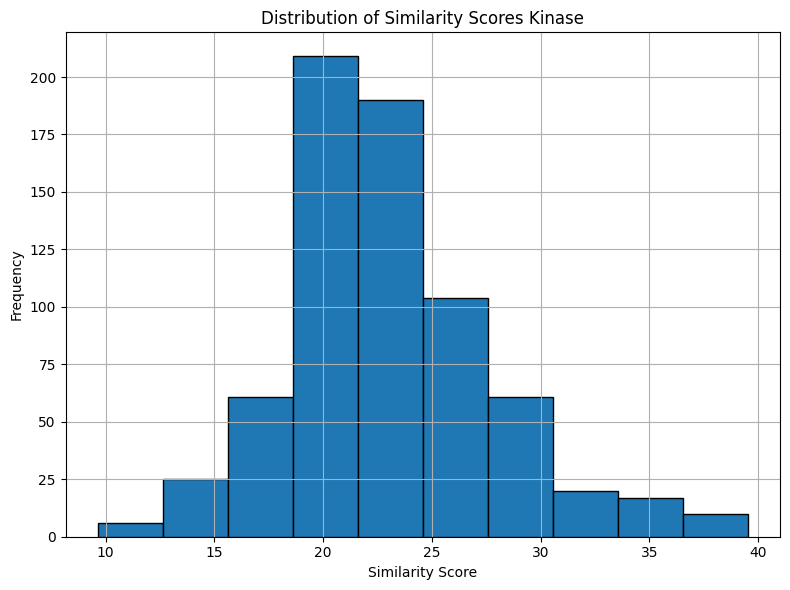

In [40]:
import matplotlib.pyplot as plt
df_kin_similarity = pd.DataFrame(df_kin_similarity)
plt.figure(figsize=(8, 6))
plt.hist(df_kin_similarity["Similarity"], bins=10, edgecolor="black")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Similarity Scores Kinase")
plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()

### Average percent similarity for for kinase

In [109]:
# Create a DataFrame
df_kin_similarity = pd.DataFrame(df_kin_similarity, columns=["Sequence A", "Sequence B", "Similarity"])

# Calculate average similarity
average_similarity = df_kin_similarity["Similarity"].mean()

# Print the average similarity
print("Average similarity for kinase:", average_similarity)

Average similarity for kinase: 22.990478569990916


#### Average similarity for kinase: 22.990478569990916 

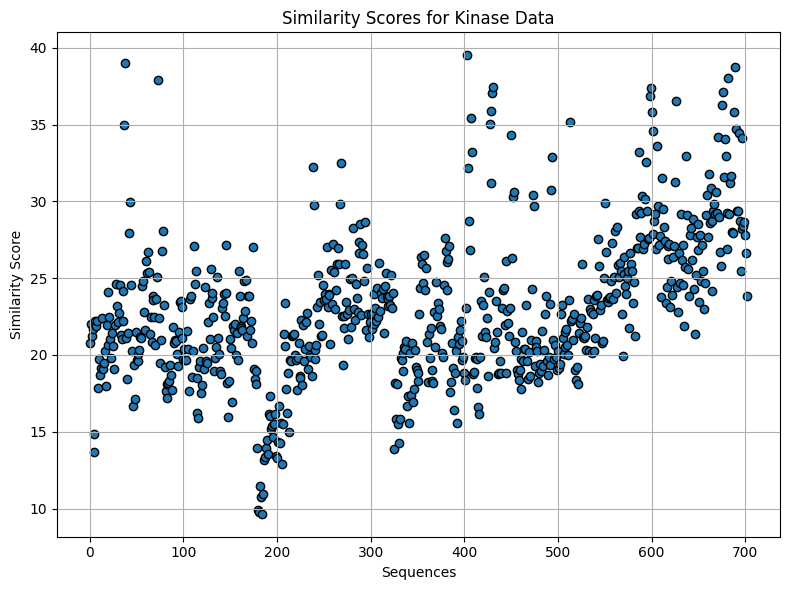

In [80]:
## Scatter plot for Similarity Scores of Kinase 

plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_kin_similarity)), df_kin_similarity["Similarity"], edgecolor="black")
plt.xlabel("Sequences")
plt.ylabel("Similarity Score")
plt.title("Similarity Scores for Kinase Data")
plt.grid(True)
plt.tight_layout()

# Display the scatter plot
plt.show()


 ### Average similarity for phosphatase

In [111]:
# Create a DataFrame
df_phos_similarity = pd.DataFrame(df_phos_similarity, columns=["Sequence A", "Sequence B", "Similarity"])

# Calculate average similarity
average_similarity = df_phos_similarity["Similarity"].mean()

# Print the average similarity
print("Average similarity for phosphatase:", average_similarity)

Average similarity for phosphatase: 26.545583996148252


#### Average similarity for phosphatase: 26.545583996148252

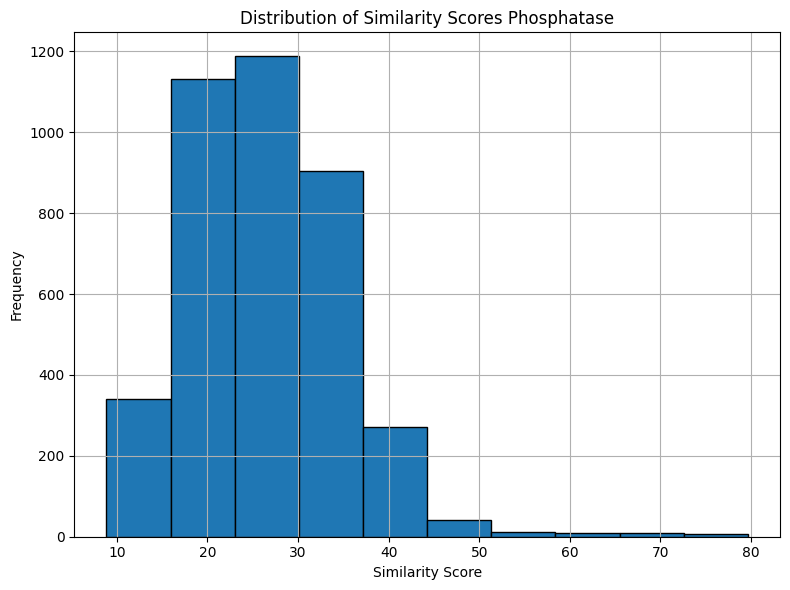

In [82]:
# Phosphatase percent similarity Visualization

plt.figure(figsize=(8, 6))
plt.hist(df_phos_similarity["Similarity"], bins=10, edgecolor="black")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Similarity Scores Phosphatase")
plt.grid(True)
plt.tight_layout()

# Display the chart
plt.show()

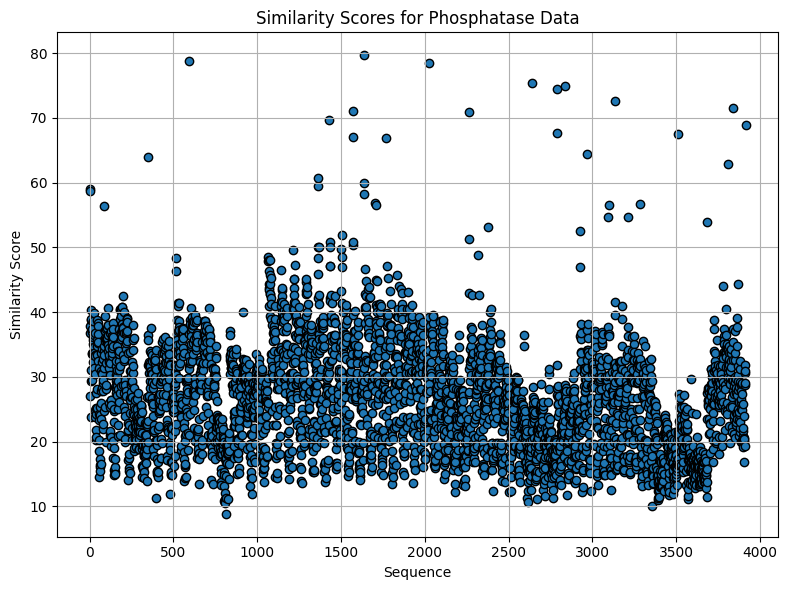

In [85]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df_phos_similarity)), df_phos_similarity["Similarity"], edgecolor="black")
plt.xlabel("Sequence")
plt.ylabel("Similarity Score")
plt.title("Similarity Scores for Phosphatase")
plt.grid(True)
plt.tight_layout()

# Display the scatter plot
plt.show()


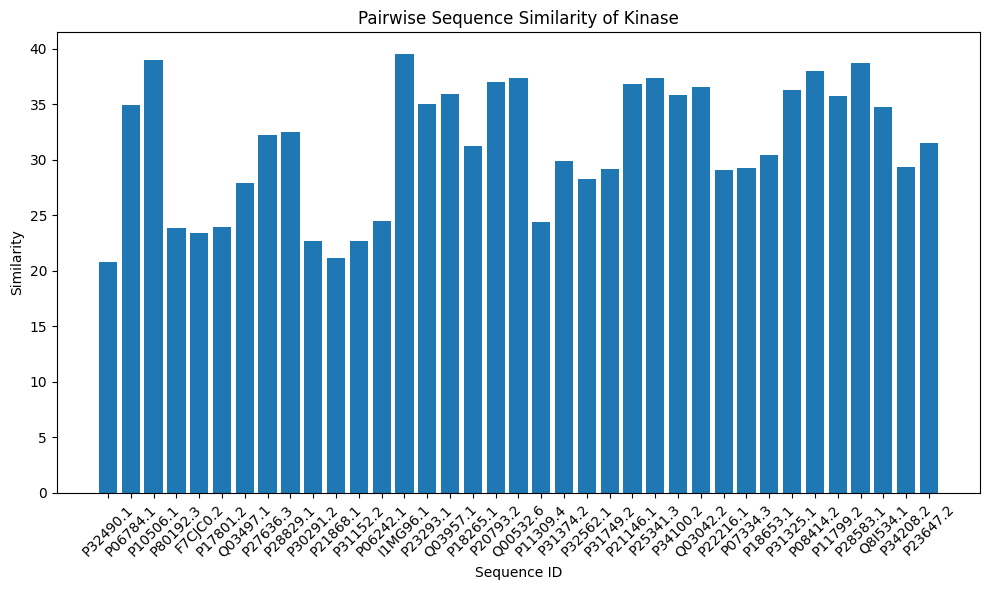

In [86]:
## Bar Plot for Kinase
#
#
#df_kin_similarity = pd.DataFrame(df_kin_similarity, columns=["Sequence A", "Sequence B", "Similarity"])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_kin_similarity["Sequence B"], df_kin_similarity["Similarity"])
plt.xlabel("Sequence ID")
plt.ylabel("Similarity")
plt.title("Pairwise Sequence Similarity of Kinase")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

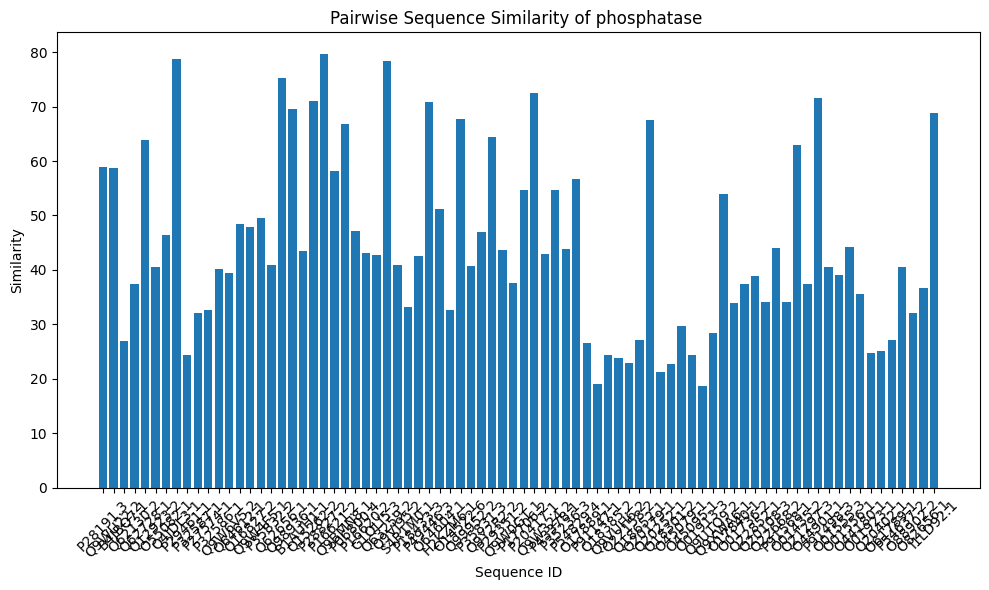

In [117]:
# Bar Plot for Pho

#df_phos_similarity = pd.DataFrame(df_phos_similarity, columns=["Sequence A", "Sequence B", "Similarity"])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_phos_similarity["Sequence B"], df_phos_similarity["Similarity"])
plt.xlabel("Sequence ID")
plt.ylabel("Similarity")
plt.title("Pairwise Sequence Similarity of phosphatase ")
plt.xticks(rotation=45)  
plt.tight_layout()

# Display the chart
plt.show()

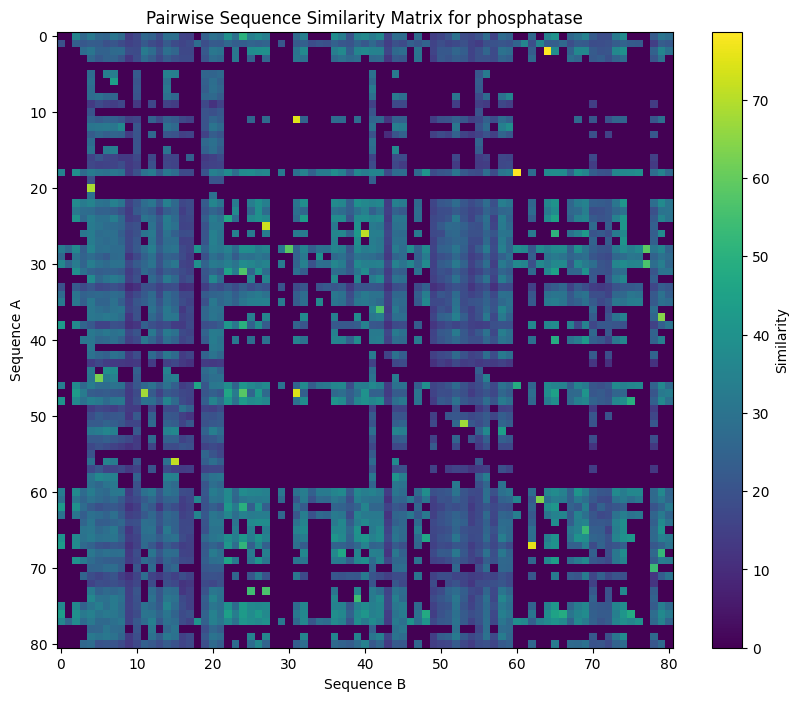

In [120]:
# Get unique sequences
sequences = sorted(set(df_phos_similarity["Sequence A"].unique()) | set(df_phos_similarity["Sequence B"].unique()))

# Create a similarity matrix
similarity_matrix = np.zeros((len(sequences), len(sequences)))

# Fill in the similarity matrix
for index, row in df_phos_similarity.iterrows():
    seq_a_index = sequences.index(row["Sequence A"])
    seq_b_index = sequences.index(row["Sequence B"])
    similarity_matrix[seq_a_index, seq_b_index] = row["Similarity"]

# Plot the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity')

#plt.xticks(np.arange(len(sequences)), sequences, rotation=90)
#plt.yticks(np.arange(len(sequences)), sequences)
plt.title('Pairwise Sequence Similarity Matrix for phosphatase')
plt.xlabel('Sequence B')
plt.ylabel('Sequence A')
plt.show()

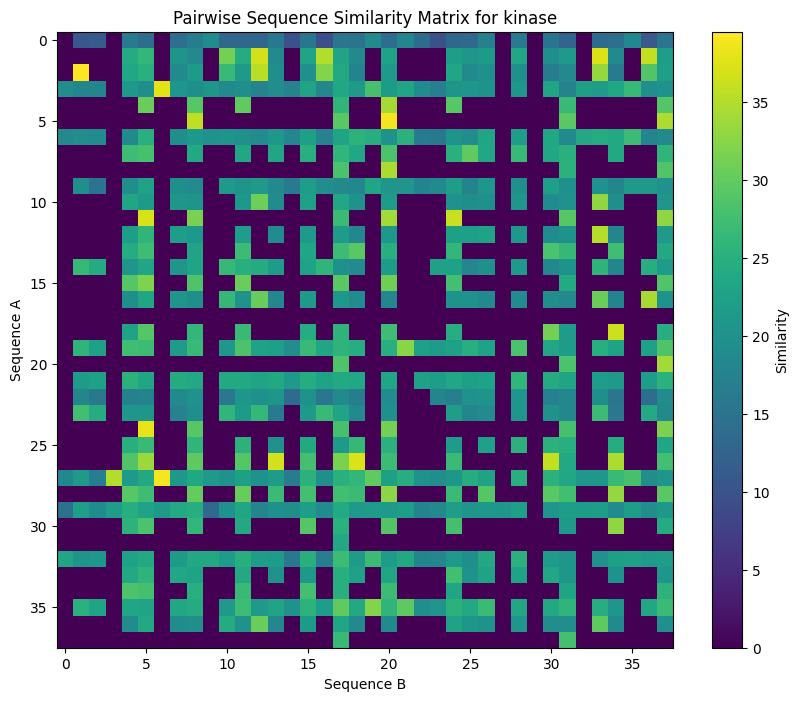

In [119]:
# Get unique sequences
sequences = sorted(set(df_kin_similarity["Sequence A"].unique()) | set(df_kin_similarity["Sequence B"].unique()))

# Create a similarity matrix
similarity_matrix = np.zeros((len(sequences), len(sequences)))

# Fill in the similarity matrix
for index, row in df_kin_similarity.iterrows():
    seq_a_index = sequences.index(row["Sequence A"])
    seq_b_index = sequences.index(row["Sequence B"])
    similarity_matrix[seq_a_index, seq_b_index] = row["Similarity"]

# Plot the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similarity')

#plt.xticks(np.arange(len(sequences)), sequences, rotation=90)
#plt.yticks(np.arange(len(sequences)), sequences)

plt.title('Pairwise Sequence Similarity Matrix for kinase')
plt.xlabel('Sequence B')
plt.ylabel('Sequence A')
plt.show()

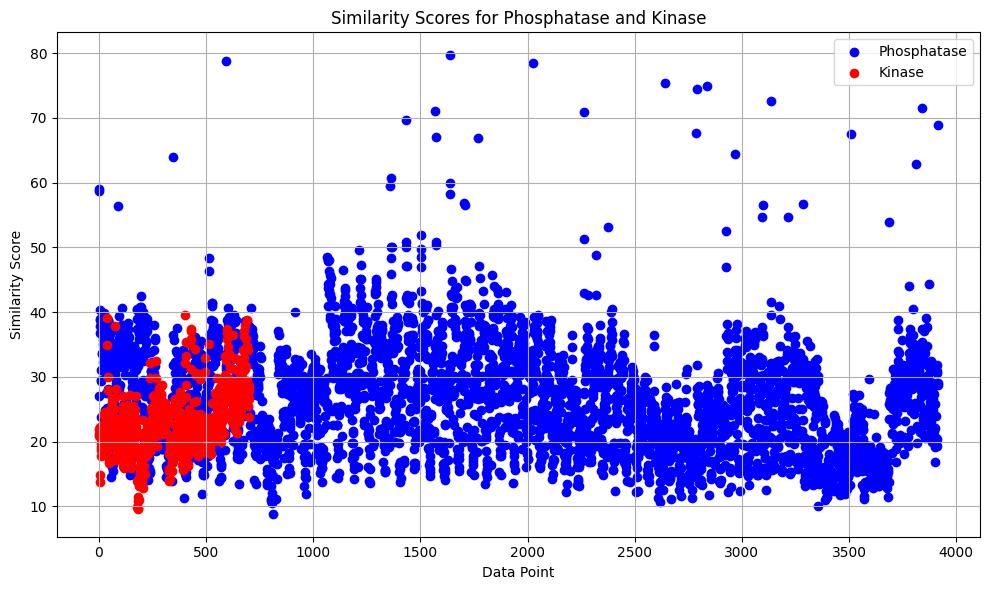

In [74]:
# diffrence in sequence similaty 

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

# Scatter plot for df_phos_similarity
plt.scatter(range(len(df_phos_similarity)), df_phos_similarity["Similarity"], color='blue', label='Phosphatase')

# Scatter plot for df_kin_similarity
plt.scatter(range(len(df_kin_similarity)), df_kin_similarity["Similarity"], color='red', label='Kinase')

plt.xlabel("Data Point")
plt.ylabel("Similarity Score")
plt.title("Similarity Scores for Phosphatase and Kinase")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the combined scatter plot
plt.show()
